information about the dataset
information about the attributes


### Explanation of the attributes in the dataset:

- **Age**: The age of the patient in years.
  
- **Sex**: The gender of the patient (M: Male, F: Female).
  
- **Chest Pain Type**: Describes the type of chest discomfort experienced by the patient:
    - **Typical Angina (TA)**: Chest pain or discomfort typically associated with heart problems, often triggered by physical exertion or emotional stress.
    - **Atypical Angina (ATA)**: Chest discomfort that doesn't fully meet the criteria for typical angina but still suggests a possible heart-related issue. The symptoms may vary and could include shortness of breath, nausea, or fatigue.
    - **Non-Anginal Pain (NAP)**: Chest discomfort not originating from the heart, which could be due to musculoskeletal issues, respiratory problems, gastrointestinal conditions, or anxiety.
    - **Asymptomatic (ASY)**: The patient does not experience any symptoms related to chest discomfort.

- **Resting Blood Pressure**: The patient's blood pressure measured while at rest, in millimeters of mercury (mm Hg).
  
- **Cholesterol**: The level of cholesterol in the patient's blood serum, measured in milligrams per deciliter (mm/dl).
  
- **Fasting Blood Sugar**: Indicates the patient's fasting blood sugar level:
    - **1**: If fasting blood sugar is greater than 120 mg/dl.
    - **0**: Otherwise.

- **Resting Electrocardiogram Results**: Interpretation of the resting electrocardiogram (ECG) findings:
    - **Normal**: ECG shows no abnormalities.
    - **ST**: ECG shows abnormalities in the ST-T wave, such as T wave inversions or ST elevation/depression of more than 0.05 millivolts (mV).
    - **LVH**: ECG suggests probable or definite left ventricular hypertrophy (enlargement of the heart's left ventricle) according to Estes' criteria.
  
- **Maximum Heart Rate Achieved**: The highest heart rate achieved during physical exertion, measured in beats per minute (bpm).

- **Exercise-Induced Angina**: Indicates whether the patient experienced angina (chest pain or discomfort) during exercise:
    - **Y**: Yes, the patient experienced exercise-induced angina.
    - **N**: No, the patient did not experience exercise-induced angina.
  
- **Oldpeak**: Refers to the ST depression observed during exercise, measured as a numeric value.

- **ST Slope**: Describes the slope of the peak exercise ST segment observed on the ECG:
    - **Up**: The ST segment slopes upwards during exercise.
    - **Flat**: The ST segment remains flat during exercise.
    - **Down**: The ST segment slopes downwards during exercise.
  
- **Heart Disease**: Indicates the presence or absence of heart disease:
    - **1**: Heart disease is present.
    - **0**: No heart disease is detected.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("heart.csv") # reading in the file contents

make codebook
and then .shape and .head on data

In [69]:
print(df.head()) # printing first 5


EDA univariaat
eda voor elk atribuut op zich zelf
bijv. verdeling per atribuut
- .isna().sum()
- .describe()
- .boxplot
- .hist
- sns.histplot
- pd.DataFrame(df["Age"].value_counts().sortindex())

EDA bivariaat
- sns.pairplot
- sns.heatmap
- sns.boxplot
- something with anova??


data impurity if necessary

EDA multivariaat
- scaled data
- PCA maybe???

In [70]:
print(df.describe())
print(df.nunique())

   Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    0           ATA        140          289          0     Normal   
1   49    1           NAP        160          180          0     Normal   
2   37    0           ATA        130          283          0         ST   
3   48    1           ASY        138          214          0     Normal   
4   54    0           NAP        150          195          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0  
              Age         Sex   RestingBP  Cholesterol   FastingBS  \
count  918.000000  918.000000  918.000000   918.000000  918.000000   
mean    53.510893    0.210240  132.396514   198.799564    0.2

In [14]:
pd.DataFrame({
    "isna": df.isna().sum()
})

,isna
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


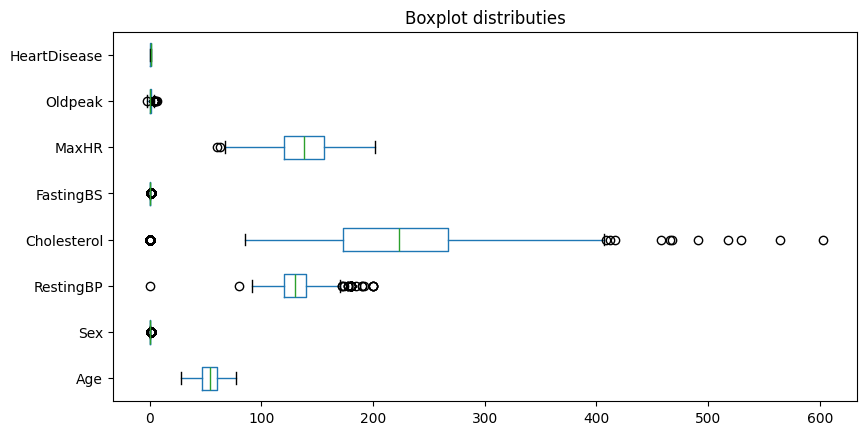

In [72]:
axs = df.boxplot(grid=False, vert=False, figsize=(9.6, 4.8))
axs.set_title("Boxplot distributies");

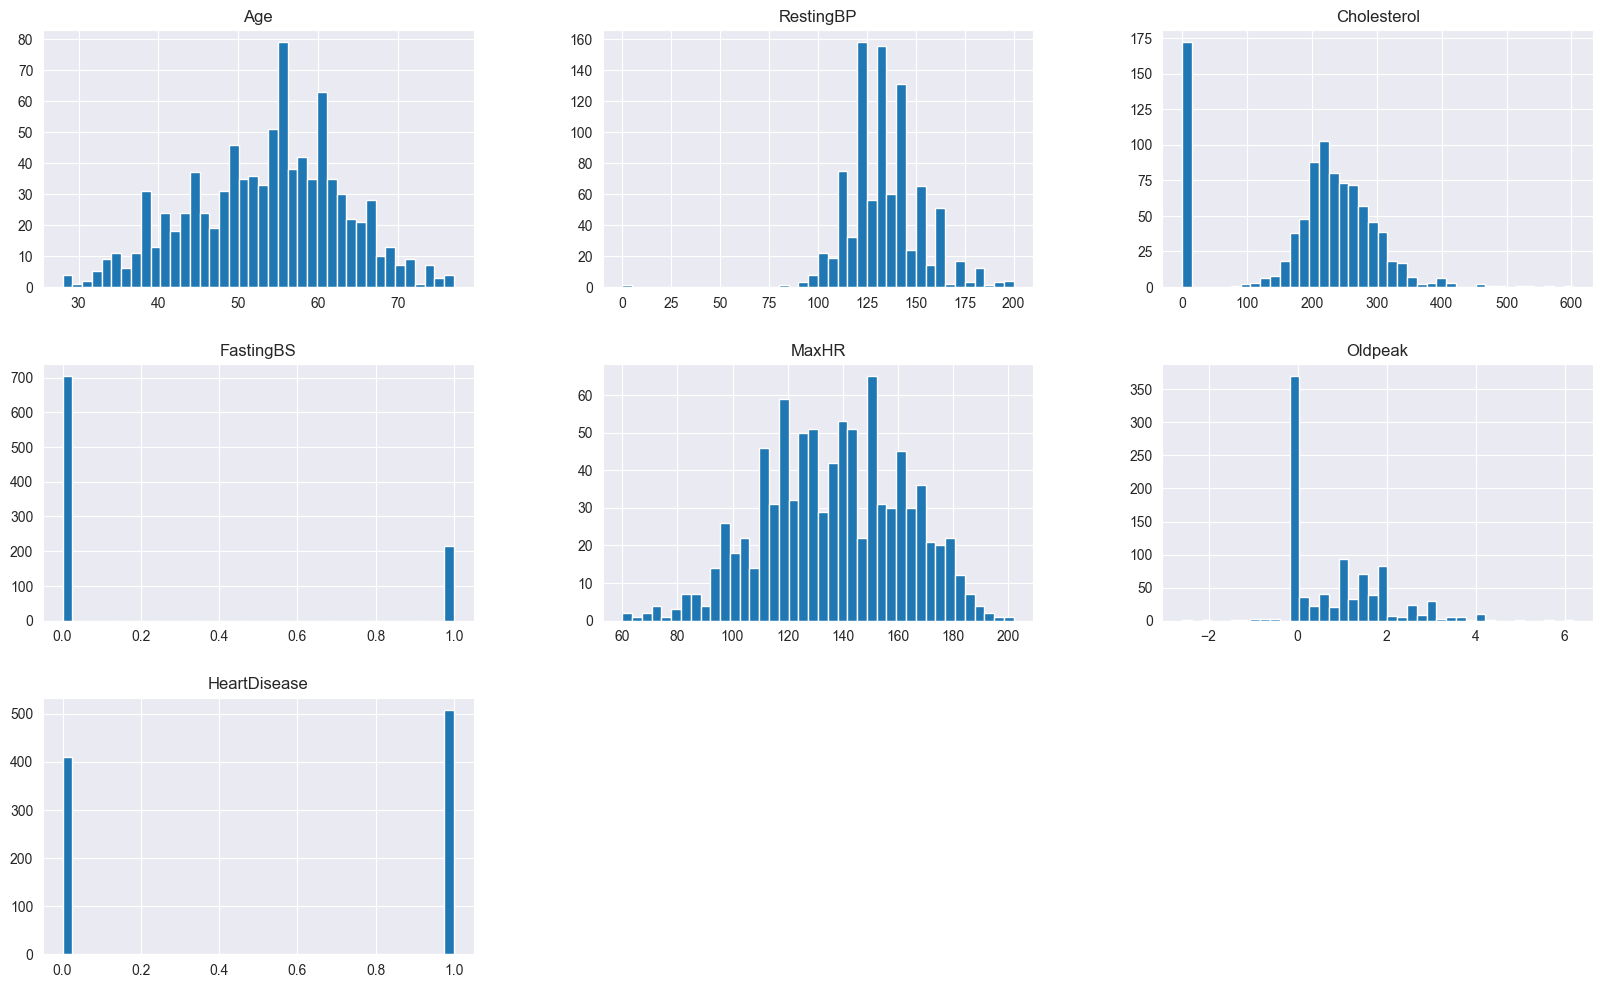

In [5]:
axs = df.hist(bins=40, figsize=(20, 12))

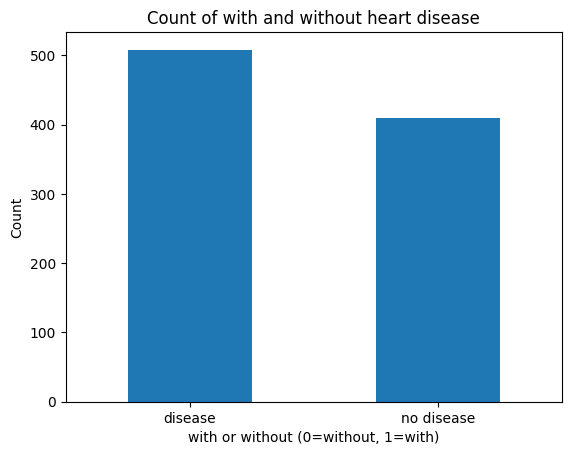

In [51]:
disease_mapping = {0: 'no disease', 1: 'disease'}

# Use the map function to replace values in the disease column
x = df['HeartDisease'].map(disease_mapping)

# Count the number of males and females
gender_counts = x.value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of with and without heart disease')
plt.xlabel('with or without a heart disease')
plt.ylabel('Count')
plt.show()

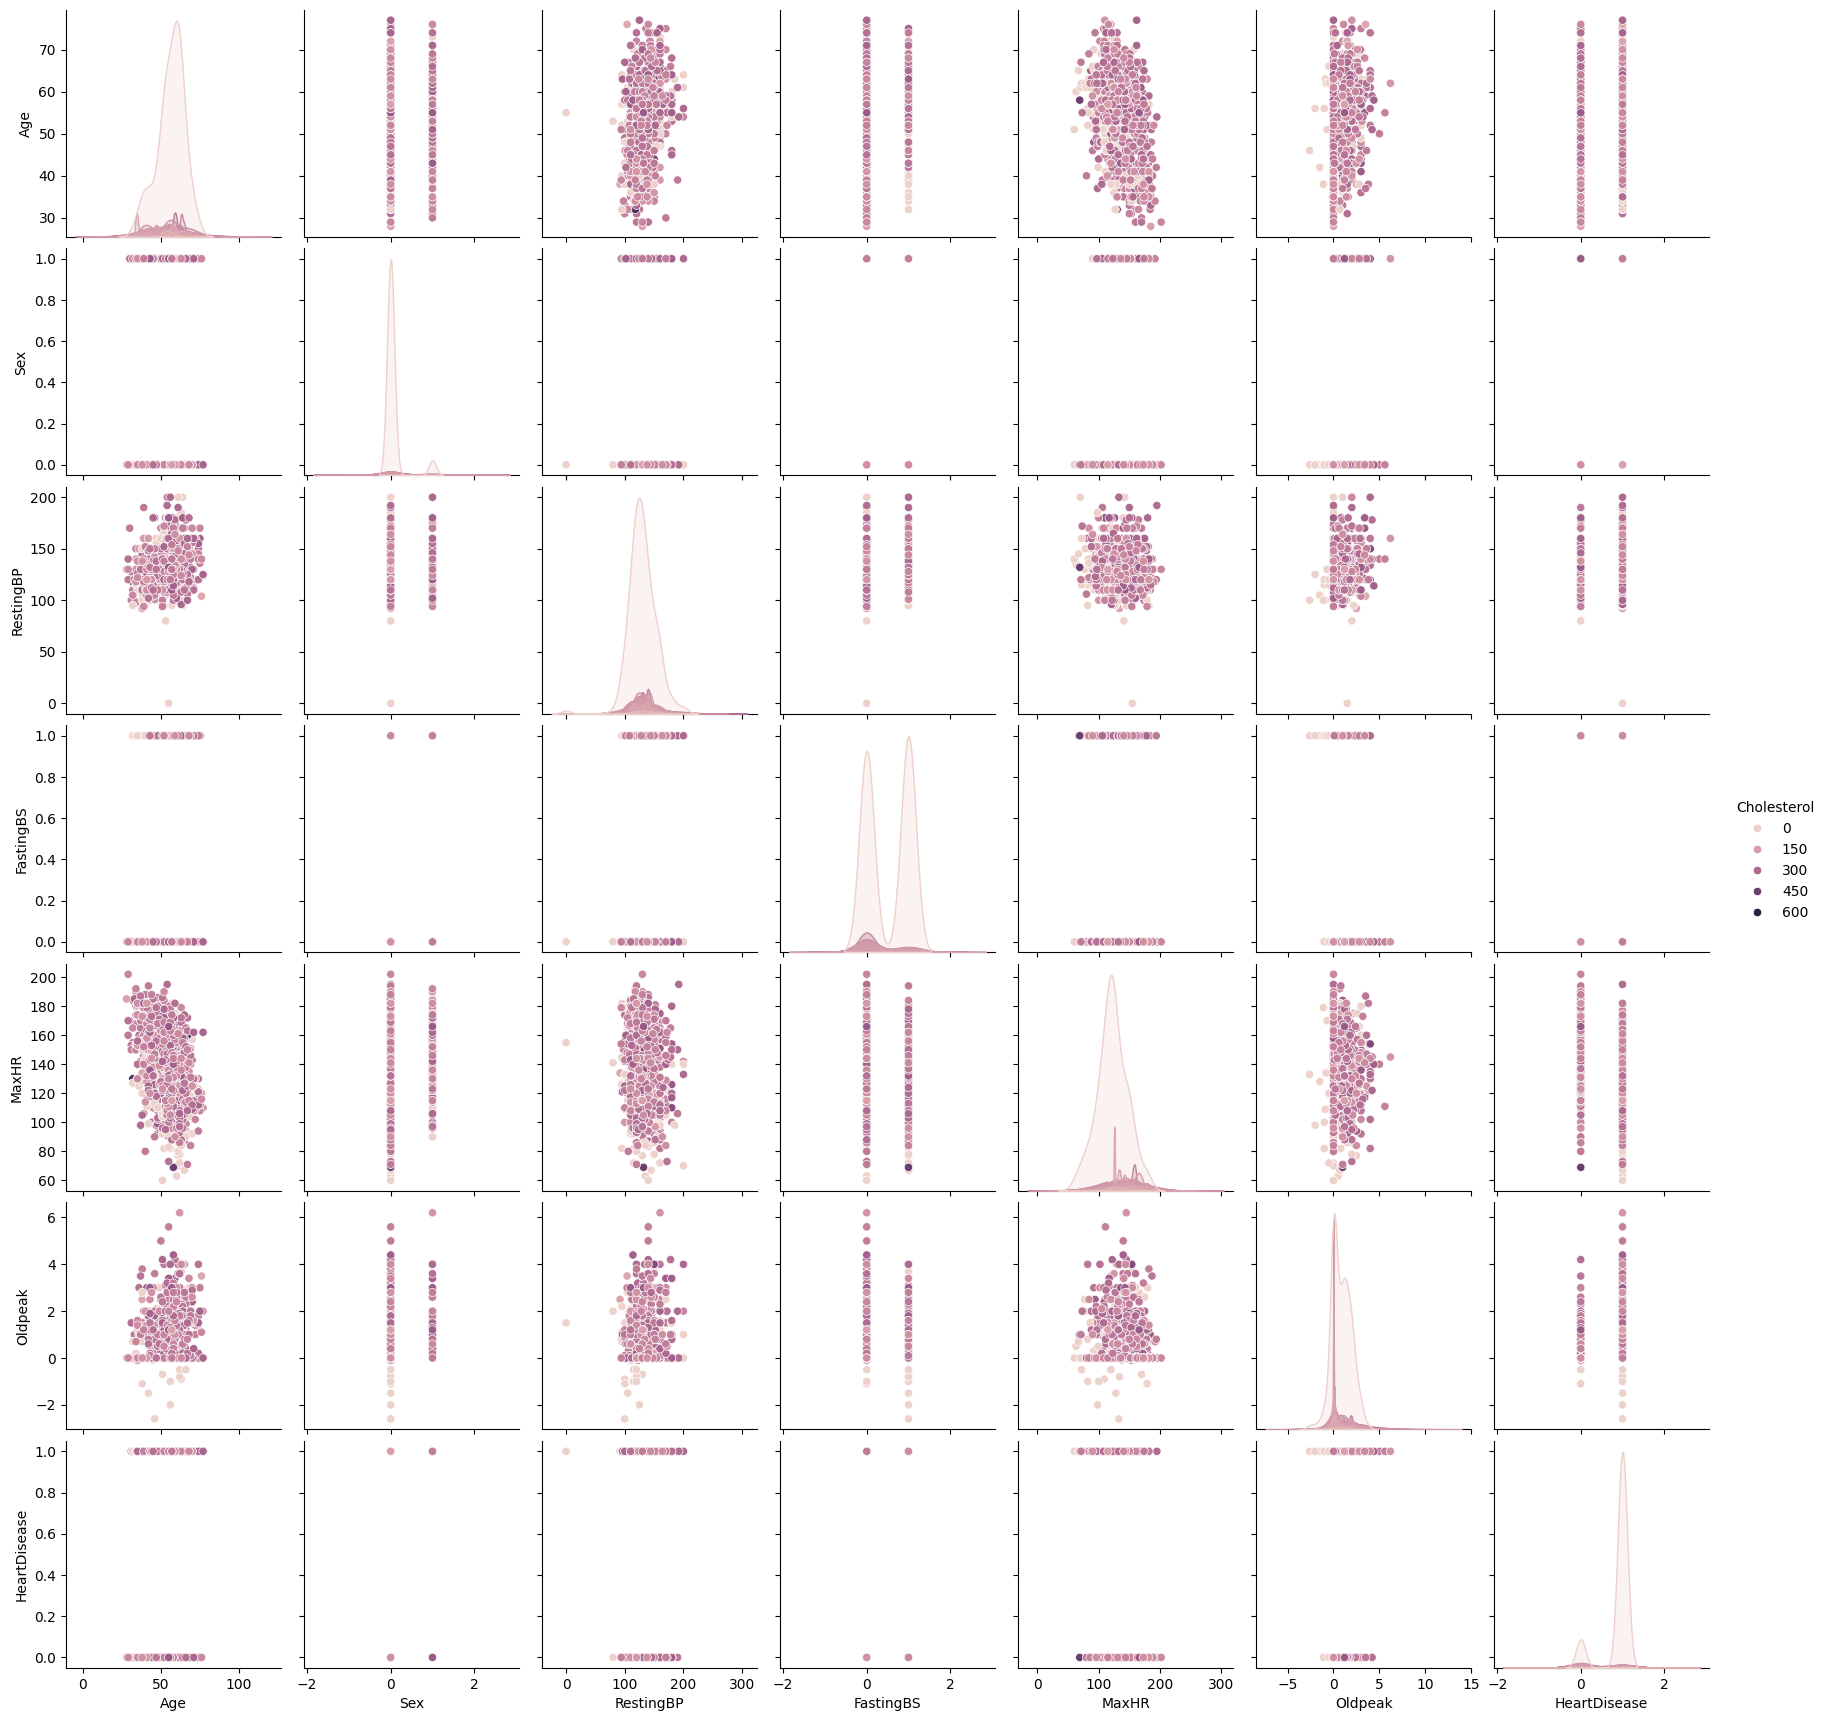

In [74]:
# heatmap
sns.pairplot(df, hue="Cholesterol");

In [6]:
hm_df = df

gender = {'M': 0, 'F': 1}# Create a dictionary to map 'M' to 0 and 'F' to 1
hm_df['Sex'] = hm_df['Sex'].map(gender)# Use the map function to replace values in the gender column

chest_pain = {'ATA': 0, 'ASY': 1, 'NAP': 2, 'TA': 3}
hm_df['ChestPainType'] = hm_df['ChestPainType'].map(chest_pain)

resting_ecg = {'Normal': 0, 'ST': 1, 'LVH': 2}
hm_df['RestingECG'] = hm_df['RestingECG'].map(resting_ecg)

exercise = {'N': 0, 'Y': 1}
hm_df['ExerciseAngina'] = hm_df['ExerciseAngina'].map(exercise)

slope = {'Down': 0, 'Flat': 1, 'Up': 2}
hm_df['ST_Slope'] = hm_df['ST_Slope'].map(slope)


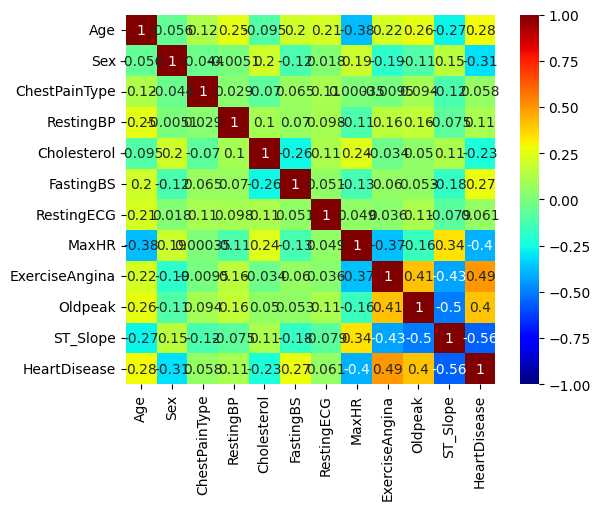

In [90]:
axs = sns.heatmap(df.corr(), annot=True, cmap="jet", vmin=-1.0, vmax=1.0, square=True)

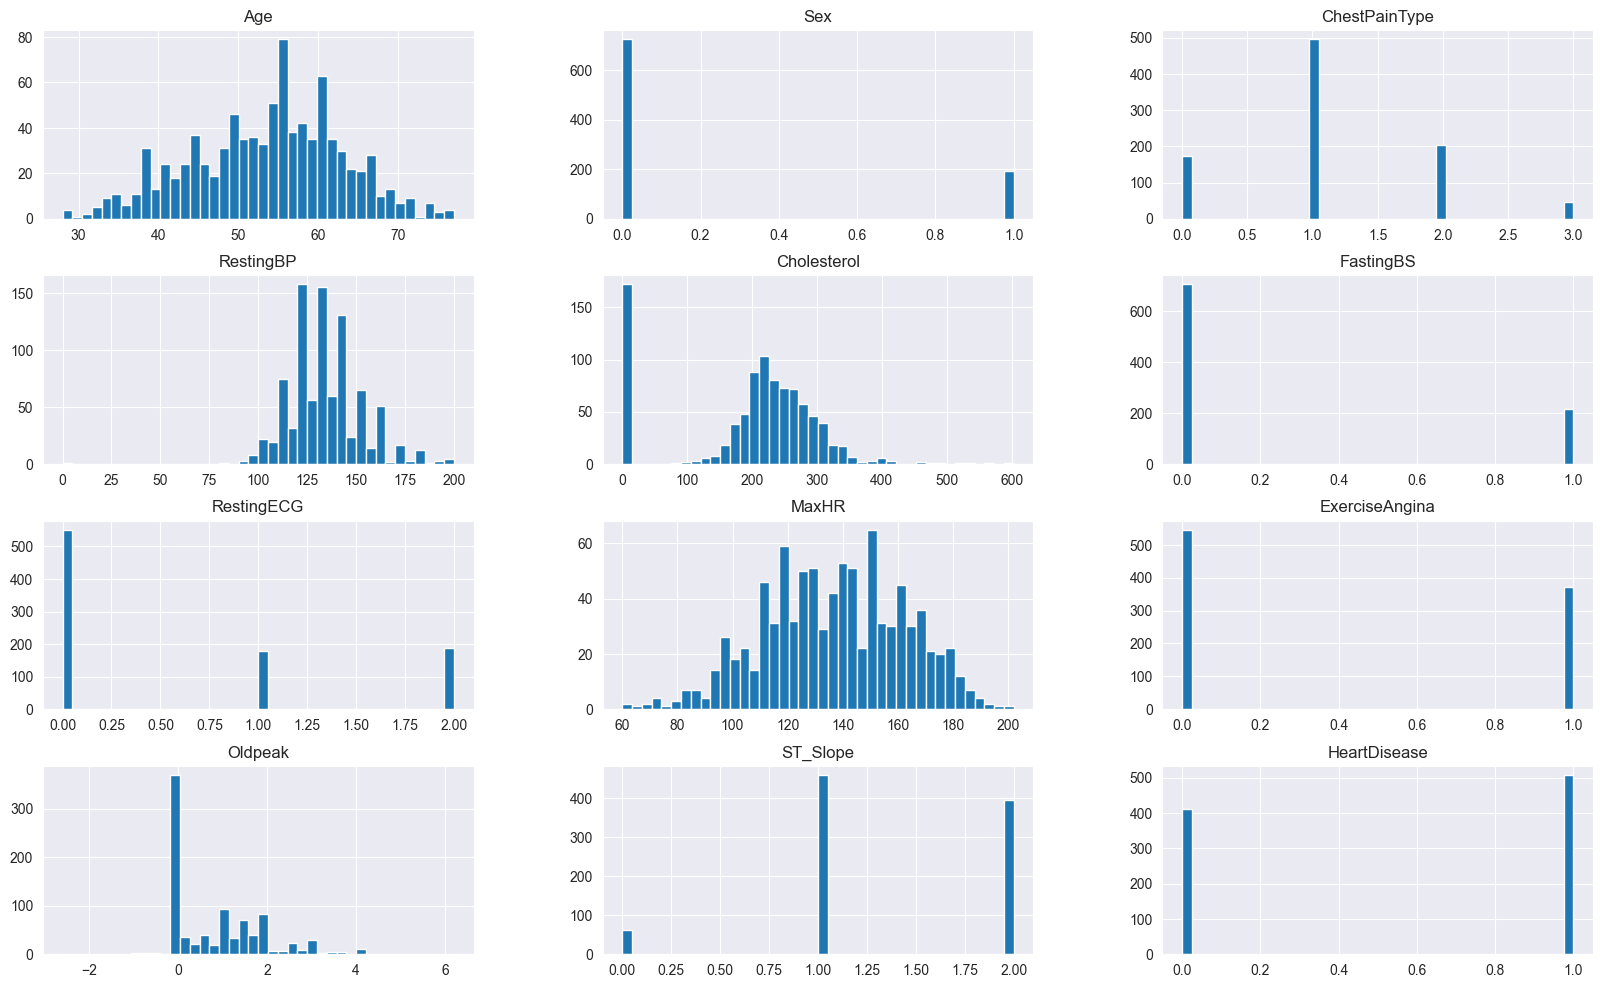

In [7]:
axs = hm_df.hist(bins=40, figsize=(20, 12))

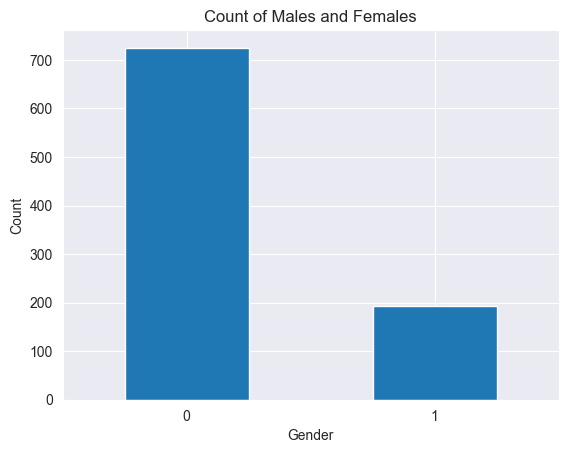

In [13]:
# Count the number of males and females
gender_counts = df['Sex'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

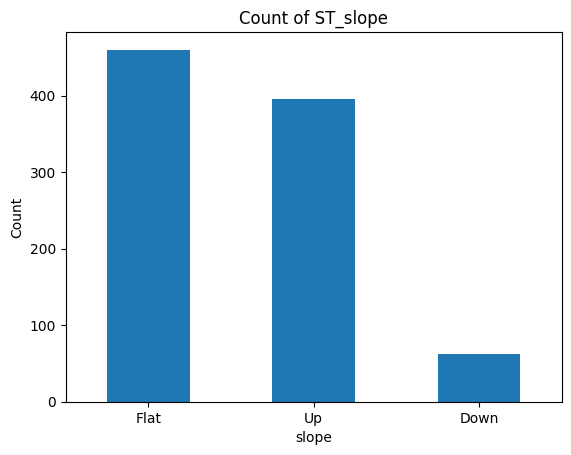

In [59]:
gender_counts = df['ST_Slope'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of ST_slope')
plt.xlabel('slope')
plt.ylabel('Count')
plt.show()


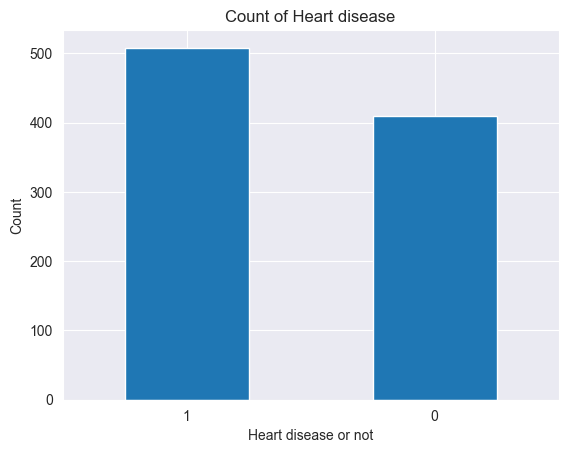

In [11]:
gender_counts = df['HeartDisease'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of Heart disease')
plt.xlabel('Heart disease or not')
plt.ylabel('Count')
plt.show()


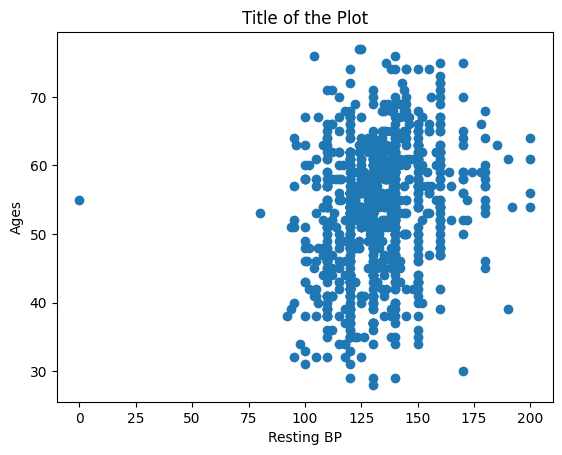

In [19]:
plt.scatter(df['RestingBP'], df['Age'])
plt.title('Title of the Plot')
plt.xlabel('Resting BP')
plt.ylabel('Ages')
plt.show()
